<a href="https://colab.research.google.com/github/sonagidevelop/HonGongMachine/blob/main/Bookcode/3.%20%ED%9A%8C%EA%B7%80%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC%20%EB%AA%A8%EB%8D%B8%EA%B7%9C%EC%A0%9C/3_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3. 특성 공학과 규제

---



여러 개의 특성을 사용한 선형 회귀를 **다중회귀** multiple resgression 라고 부른다.

> 특성 1개 = 하나의 차원

기존 특성을 이용해 새로운 특성을 뽑아내는 작업을 **특성 공학** feature engineering 이라고 한다.

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

In [2]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다.
이런 클래스를 **변환기** transformer 라고 부른다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures


In [5]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


PolynomialFeatures 클래스는 기본적으로 **각 특성을 제곱한 항**을 추가하고   
**특성끼리 곱한 항**을 추가한다. 이에 더해 **1**도 추가한다.   
그러나 1처럼 자동으로 특성에 추가된 절편 항은 사이킷런 모델이 **자동으로 무시**한다.

In [7]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)


(42, 9)


In [9]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [10]:
test_poly = poly.transform(test_input)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [14]:
print(lr.score(test_poly, test_target))

0.9714559911594132


In [15]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [16]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991096


In [17]:
print(lr.score(test_poly, test_target))

-144.40579242335605


특성의 개수를 너무 늘려서 너무 모델과 똑같이 학습을 해 버린 것이다.

# 규제 regularization
머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것   


그 전에 **정규화**를 먼저 해야한다.

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


# 릿지 ridge 회귀
계수를 제곱한 값을 기준으로 규제를 적용

In [21]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


규제를 **얼만큼 적용** 할 것인가? 를 정하는 것이 **alpha**값이다.   
클 수록 규제 강도가 세다.

> alpha값처럼 모델이 학습하는 것이 아니라 사전에 지정해 줘야 하는 값을 **하이퍼파라미터** hyperparameter라고 한다.

적절한 alpha 값을 찾는 방법은 **알파 값에 대한 결정계수 값의 그래프**를 그리는 것이다.

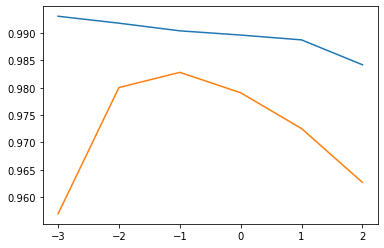

In [24]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

훈련 세트의 점수와 테스트 세트의 점수의 격차가 가장 적은 알파 값은 -1 즉 0.1이다.

In [25]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


# 라쏘 lasso 회귀
계수의 절댓값을 기준으로 규제를 적용

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9897898972080961
0.9800593698421883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


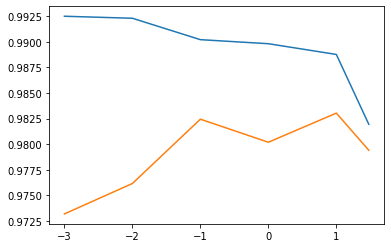

In [33]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10,30]
for alpha in alpha_list:
  lasso =Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

최적의 알파값은 1 즉 10이고, 라쏘 모델에서 나오는 ConvergenceWarning은 반복의 횟수가 적을 때 나타나는 현상이다.

In [34]:
lasso =Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131867
0.9824470598706695


In [35]:
print(np.sum(lasso.coef_==0))

40


이 값이 40이라는 것은 라쏘모델에서 자동적으로 55개의 특성 중 40개의 특성은 0으로 만들어서 사용했다는 것이다. 이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있다.